# 2 - Learning in a perceptron

I denna notebook visas hur man implementerar lärande i en perceptron. Vi startar med en dum perceptron som initialieras random och gör sedan två träningssessioner. 

1. Tränar perceptronen att känna igen 0 och 1 
1. Tränar perceptronen att negera input 

In [3]:
import random
import numpy as np

In [20]:
#Aktiveringsfunktionen
def step_function(x, threshold):
    if x < threshold:
        return 0
    elif x >= threshold:
        return 1

class Perceptron1():
    """Denna klass implementerar en perceptron som tar 1 input."""
    
    def __init__(self, w1, threshold, activation_function):
        self.w1 = w1
        self.threshold = threshold
        self.activation_function = activation_function
    
    def activate(self, x1):
        output = self.activation_function(x1 * self.w1, self.threshold)
        return output
    
    def train(self, X, y, learning_rate=0.01, iterations=50):
        self.w1 = random.uniform(0, 0.1)
        self.threshold = random.uniform(-1, 1)
        self.errors = []
        self.w1_breadcrumbs = []
        self.t_breadcrumbs = [self.threshold]

        for _ in range(iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = learning_rate * (target - self.activate(xi))
                self.w1 +=  update * xi
                self.w1 +=  update
                errors += int(update != 0.0)
            self.w1_breadcrumbs.append(self.w1)
            self.errors.append(errors)
            # Om felen blir fler (sämre) reseta tröskelvärdet helt random 
            if self.errors[-1] > self.errors[0]:
                self.threshold = random.uniform(-1, 1)
                self.t_breadcrumbs.append(self.threshold)

Skapa en neuron som inte kan eller vet något:

In [13]:
# default state
p1 = Perceptron1(w1=0.001, threshold=0.5, activation_function=step_function)

In [14]:
p1.activate(0)

0

In [15]:
p1.activate(1)

0

Låt oss träna vår neuron att känna igen 1 och 0:

In [16]:
p1.train([1, 0, 1, 0, 0], [1, 0, 1, 0, 0])

In [17]:
p1.activate(1)

1

In [18]:
p1.activate(0)

0

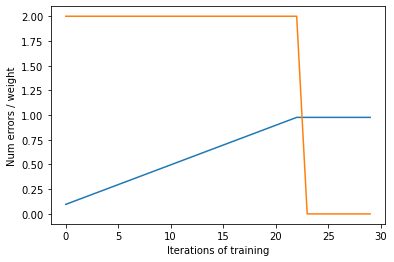

In [19]:
#Visulaisera hur träningen ser ut, och hur mycket bättre neuronen blir 
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Num errors / weight')
plt.xlabel('Iterations of training')
plt.plot(np.array(p1.w1_breadcrumbs))
plt.plot(np.array(p1.errors))

Now we train the same neuron again to negate the inputs, by running `train()` with inversed expected outputs:

In [25]:
p1.train([1, 0, 1, 0, 0], [0, 1, 0, 1, 1])

In [26]:
p1.activate(0)

1

In [27]:
p1.activate(1)

0

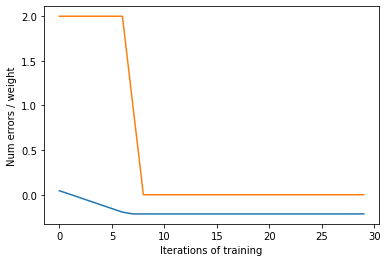

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Num errors / weight')
plt.xlabel('Iterations of training')
plt.plot(np.array(p1.w1_breadcrumbs))
plt.plot(np.array(p1.errors))